In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Dropout
import tensorflow as tf

In [8]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, _), (_, _) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0

# Reshape the data to match the required input shape for the GAN
X_train = X_train.reshape(-1, 28, 28, 1)


In [9]:
# Define generator
generator = Sequential([
    Dense(7 * 7 * 64, input_shape=[100]),
    Reshape([7, 7, 64]),
    BatchNormalization(),
    Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="relu"),
    BatchNormalization(),
    Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh")
])

In [10]:
# Define discriminator
discriminator = Sequential([
    Conv2D(64, kernel_size=5, strides=2, padding="same", activation=LeakyReLU(0.3), input_shape=[28, 28, 1]),
    Dropout(0.5),
    Conv2D(128, kernel_size=5, strides=2, padding="same", activation=LeakyReLU(0.3)),
    Dropout(0.5),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [11]:
# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
# Compile GAN
discriminator.trainable = False
GAN = Sequential([generator, discriminator])
GAN.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
# Training parameters
epochs = 20
batch_size = 128
noise_shape = 100

Epoch 1/20
4/4 [==============================] - 0s 20ms/step
Epoch 2/20
4/4 [==============================] - 0s 25ms/step
Epoch 3/20
4/4 [==============================] - 0s 20ms/step
Epoch 4/20
4/4 [==============================] - 0s 21ms/step
Epoch 5/20
1/1 [==============================] - 0s 142ms/step


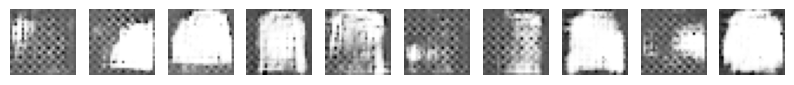

Epoch 6/20
4/4 [==============================] - 0s 37ms/step
Epoch 7/20
4/4 [==============================] - 0s 21ms/step
Epoch 8/20
4/4 [==============================] - 0s 23ms/step
Epoch 9/20
4/4 [==============================] - 0s 22ms/step
Epoch 10/20
1/1 [==============================] - 0s 31ms/step


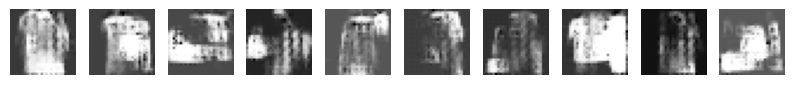

Epoch 11/20
4/4 [==============================] - 0s 21ms/step
Epoch 12/20
4/4 [==============================] - 0s 21ms/step
Epoch 13/20
4/4 [==============================] - 0s 30ms/step
Epoch 14/20
4/4 [==============================] - 0s 22ms/step
Epoch 15/20
1/1 [==============================] - 0s 28ms/step


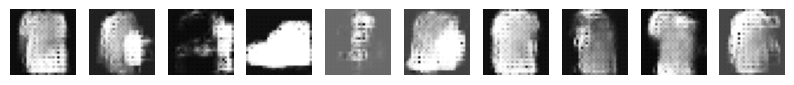

Epoch 16/20
4/4 [==============================] - 0s 22ms/step
Epoch 17/20
4/4 [==============================] - 0s 27ms/step
Epoch 18/20
4/4 [==============================] - 0s 22ms/step
Epoch 19/20
4/4 [==============================] - 0s 27ms/step
Epoch 20/20
1/1 [==============================] - 0s 35ms/step


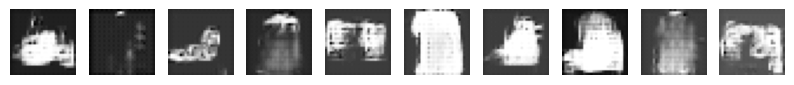

Training is complete


In [14]:
# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    for i in range(len(X_train) // batch_size):
        noise = np.random.normal(size=[batch_size, noise_shape])
        gen_images = generator.predict(noise)

        real_images = X_train[i * batch_size : (i + 1) * batch_size]

        # Train discriminator on real images
        d_loss_real = discriminator.train_on_batch(real_images, np.ones(batch_size))

        # Train discriminator on fake images
        d_loss_fake = discriminator.train_on_batch(gen_images, np.zeros(batch_size))

        # Train generator
        noise = np.random.normal(size=[batch_size, noise_shape])
        g_loss = GAN.train_on_batch(noise, np.ones(batch_size))

    # Display generated images
    if (epoch + 1) % 5 == 0:
        samples = 10
        gen_images = generator.predict(np.random.normal(size=[samples, noise_shape]))

        plt.figure(figsize=(10, 1))
        for k in range(samples):
            plt.subplot(1, samples, k + 1)
            plt.imshow(gen_images[k].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.show()

print('Training is complete')